<a href="https://colab.research.google.com/github/quangnvhe163833/DBI202-Assignment/blob/main/Evaluate_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score,classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
#Load model
model = load_model('/content/best_MobileNet_Dataset_Train_1.keras')

In [ ]:
#Processing Data
def processing_data(data_name):
  zip_file = f"/content/{data_name}.zip"
  destination_dir = f'/content/{data_name}'
  if not os.path.exists(destination_dir):
      os.makedirs(destination_dir)
  def auto_answer_yes(command):
      return 'y\n'
  os.system = auto_answer_yes
  !unzip -q {zip_file} -d {destination_dir}
  !ls {destination_dir}
  test_dir = f"/content/{data_name}/{data_name}"
  test_datagen = ImageDataGenerator(rescale=1./255)
  test_generator = test_datagen.flow_from_directory(
      test_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical',
      shuffle=False)
  return test_generator

#Evaluate Data
def evaluated_test_data(model, test_generator):
  predictions = model.predict(test_generator)
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_generator.classes
  f1_test = f1_score(true_classes, predicted_classes, average='weighted')
  print(f"F1 Score Test : {f1_test:.4f}")
  class_labels = list(test_generator.class_indices.keys())
  report_test = classification_report(true_classes, predicted_classes, target_names=class_labels)
  print(report_test)
  accuracy = accuracy_score(true_classes, predicted_classes)
  print("Accuracy: ", accuracy)
  return true_classes, predicted_classes, class_labels

#Biểu đồ Accuracy và Loss trong quá trình train và validation
def plot_training_history(history):
    # Biểu đồ Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Biểu đồ Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

replace /content/Dataset_Test_1/Dataset_Test_1/Fake/fake_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Dataset_Test_1
Found 540 images belonging to 2 classes.
 2/17 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
F1 Score Test : 0.8541
              precision    recall  f1-score   support

        Fake       0.80      0.89      0.84       240
        Real       0.90      0.83      0.86       300

    accuracy                           0.85       540
   macro avg       0.85      0.86      0.85       540
weighted avg       0.86      0.85      0.85       540

Accuracy:  0.8537037037037037


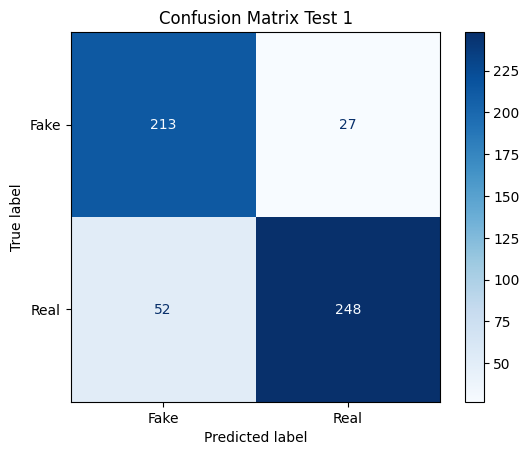

In [ ]:
#Evaluate Data Test 1
test_generator_1 = processing_data('Dataset_Test_1')
true_classes, predicted_classes, class_labels = evaluated_test_data(model, test_generator_1)
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Test 1')
plt.show()

replace /content/Dataset_Test_2/Dataset_Test_2/Fake/asian1005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Dataset_Test_2
Found 800 images belonging to 2 classes.
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
F1 Score Test : 0.6639
              precision    recall  f1-score   support

        Fake       0.58      1.00      0.73       350
        Real       1.00      0.44      0.61       450

    accuracy                           0.68       800
   macro avg       0.79      0.72      0.67       800
weighted avg       0.82      0.68      0.66       800

Accuracy:  0.68375


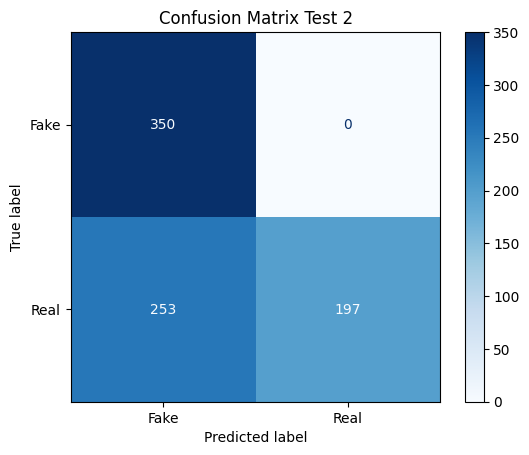

In [ ]:
#Evaluate Data Test 2
test_generator_2 = processing_data('Dataset_Test_2')
true_classes, predicted_classes, class_labels = evaluated_test_data(model, test_generator_2)
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Test 2')
plt.show()

replace /content/Dataset_Test_3/Dataset_Test_3/Fake/asian1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Dataset_Test_3
Found 930 images belonging to 2 classes.
 2/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
F1 Score Test : 0.8351
              precision    recall  f1-score   support

        Fake       0.77      0.97      0.85       460
        Real       0.96      0.71      0.82       470

    accuracy                           0.84       930
   macro avg       0.86      0.84      0.84       930
weighted avg       0.86      0.84      0.84       930

Accuracy:  0.8376344086021505


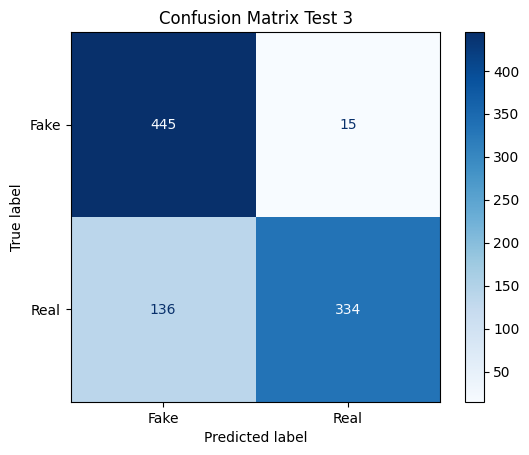

In [ ]:
#Evaluate Data Test 3
test_generator_3 = processing_data('Dataset_Test_3')
true_classes, predicted_classes, class_labels = evaluated_test_data(model, test_generator_3)
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Test 3')
plt.show()

In [ ]:
#Evaluate 10set Data Test 1
zip_file = '/content/Data_Test_10_set_1.zip'
test_dir = '/content/Test_Full/Data_Test_10_set_1'

destination_dir = '/content/Test_Full'
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)
def auto_answer_yes(command):
    return 'y\n'
os.system = auto_answer_yes
!unzip -q {zip_file} -d {destination_dir}
!ls {destination_dir}
test_datagen = ImageDataGenerator(rescale=1./255)
test_generators = {}
subfolders = [f.path for f in os.scandir(test_dir) if f.is_dir()]
for i, subfolder in enumerate(subfolders):
    test_generators[f'test_generator_{i+1}'] = test_datagen.flow_from_directory(
        subfolder,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )
for name, generator in test_generators.items():
    print(f"{name} has {generator.samples} samples")
accuracy_full = []
f1_full = []
for name, generator in test_generators.items():
    name_data_test = test_generators[name]
    predictions = model.predict(name_data_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = name_data_test.classes
    f1 = f1_score(true_classes, predicted_classes, average='weighted')
    accuracy = accuracy_score(true_classes, predicted_classes)
    accuracy_full.append(accuracy)
    f1_full.append(f1)
    print(f"{name} has F1 Score: {f1:.4f} and Accuracy: {accuracy:.4f}")
print('-'*100)
print(f'ACC-MEAN: {sum(accuracy_full)/len(accuracy_full):.4f}')
print(f'F1-MEAN: {sum(f1_full)/len(f1_full):.4f}')

replace /content/Test_Full/Data_Test_10_set_1/dts_test_1/Fake/fake_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Data_Test_10_set_1
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
test_generator_1 has 540 samples
test_generator_2 has 540 samples
test_generator_3 has 540 samples
test_generator_4 has 540 samples
test_generator_5 has 540 samples
test_generator_6 has 540 samples
test_generator_7 has 540 samples
test_generator_8 has 1047 samples
test_generator_9 has 540 samples
test_generator_10 has 540 samples
 4/17 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
test_generator_1 has F1 Score: 0.8745 and Accuracy: 0.8741
 3/17 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
test_generator_2 has F1 Score: 0.8542 and Accuracy: 0.8537
 2/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
test_generator_3 has F1 Score: 0.8726 and Accuracy: 0.8722
 2/17 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
test_generator_4 has F1 Score: 0.8485 and Accuracy: 0.8481
 2/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
test_generator_5 has F1 Score: 0.8541 and Accuracy: 0.8537
 2/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
test_generator_6 has F1 Score: 0.8485 and Accuracy: 0.8481
 4/17 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
test_generator_7 has F1 Score: 0.8707 and Accuracy: 0.8704
 4/33 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step
test_generator_8 has F1 Score: 0.8676 and Accuracy: 0.8672
 3/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
test_generator_9 has F1 Score: 0.8797 and Accuracy: 0.8796
 3/17 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
test_generator_10 has F1 Score: 0.8560 and Accuracy: 0.8556
----------------------------------------------------------------------------------------------------
ACC-MEAN: 0.8623
F1-MEAN: 0.8626


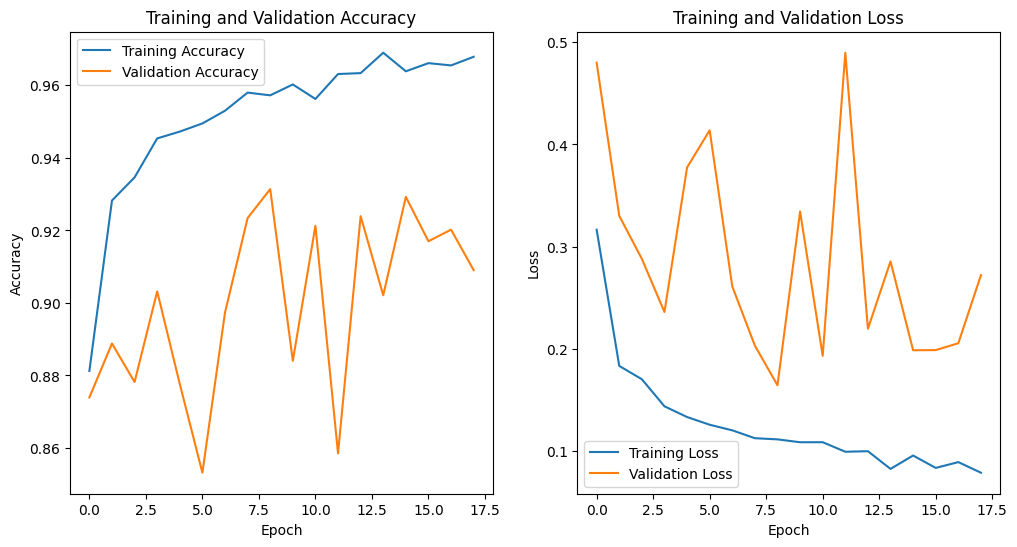

In [ ]:
#Plot training history Model 1
with open('/content/history_model_1.json', 'r') as f:
    history_data = json.load(f)
plot_training_history(history_data)